# Lab 04 : Train vanilla neural network -- exercise


# Training a one-layer net on  FASHION-MNIST

In [1]:
# For Google Colaboratory
import sys, os
if 'google.colab' in sys.modules:
    from google.colab import drive
    drive.mount('/content/gdrive')
    file_name = 'train_vanilla_nn_exercise.ipynb'
    import subprocess
    path_to_file = subprocess.check_output('find . -type f -name ' + str(file_name), shell=True).decode("utf-8")
    print(path_to_file)
    path_to_file = path_to_file.replace(file_name,"").replace('\n',"")
    os.chdir(path_to_file)
    !pwd

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from random import randint
import utils

### Download the TRAINING SET (data+labels)

In [3]:
from utils import check_fashion_mnist_dataset_exists
data_path=check_fashion_mnist_dataset_exists()

train_data=torch.load(data_path+'fashion-mnist/train_data.pt')
train_label=torch.load(data_path+'fashion-mnist/train_label.pt')
print(train_data.size())
print(train_label.size())

torch.Size([60000, 28, 28])
torch.Size([60000])


### Download the TEST SET (data only)

In [4]:
test_data=torch.load(data_path+'fashion-mnist/test_data.pt')
print(test_data.size())

torch.Size([10000, 28, 28])


### Make a one layer net class

In [5]:
class one_layer_net(nn.Module):

    def __init__(self, input_size, output_size):
        super(one_layer_net , self).__init__()
        
        self.fc = nn.Linear(input_size,output_size)
        
    def forward(self, x):
        
        x = self.fc(x)
        p = F.softmax(x, dim=1)
        
        return p

### Build the net

In [6]:
net=one_layer_net(784,10)
print(net)

one_layer_net(
  (fc): Linear(in_features=784, out_features=10, bias=True)
)


### Take the 4th image of the test set:

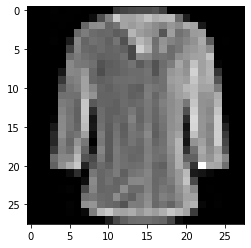

In [7]:
im= test_data[4]
utils.show(im)

### And feed it to the UNTRAINED network:

In [8]:
p = net(im.view(1,-1))
print(p)

tensor([[0.0772, 0.1058, 0.0943, 0.1044, 0.1110, 0.1127, 0.1146, 0.1014, 0.0917,
         0.0870]], grad_fn=<SoftmaxBackward>)


### Display visually the confidence scores

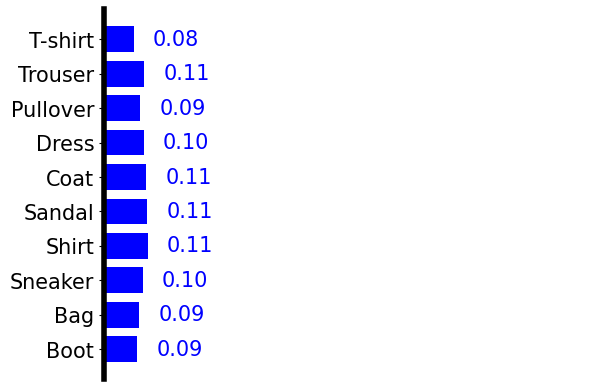

In [9]:
utils.show_prob_fashion_mnist(p)

### Train the network (only 5000 iterations) on the train set

In [10]:
criterion = nn.NLLLoss()
optimizer=torch.optim.SGD(net.parameters() , lr=0.01 )

for iter in range(1,5000):
    
    # choose a random integer between 0 and 59,999 
    # extract the corresponding picture and label
    # and reshape them to fit the network
    idx=torch.randint(60000, (1,))
    input=train_data[idx].view(1,-1)
    label=train_label[idx].view(1)


    # feed the input to the net  
    input.requires_grad_() # for backprobagation -- we will discuss it later
    prob=net(input)
 
    # update the weights (all the magic happens here -- we will discuss it later)
    log_prob=torch.log(prob)
    loss = criterion(log_prob, label)    
    optimizer.zero_grad()       
    loss.backward()
    optimizer.step()

### Take the 34th image of the test set:

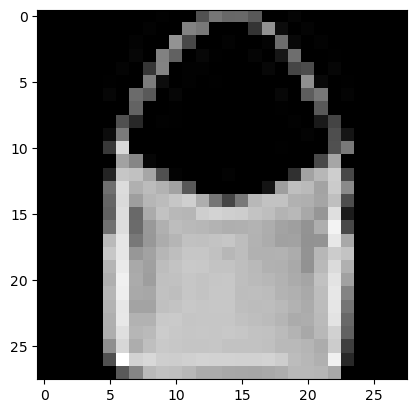

In [11]:
im=test_data[34]
utils.show(im)

### Feed it to the TRAINED net:

In [12]:
p = net(im.view(1,-1))
print(p)

tensor([[5.1402e-04, 1.2143e-05, 3.0156e-02, 1.4210e-02, 6.6756e-03, 3.2444e-02,
         3.4561e-03, 2.6569e-04, 9.1082e-01, 1.4458e-03]],
       grad_fn=<SoftmaxBackward>)


### Display visually the confidence scores

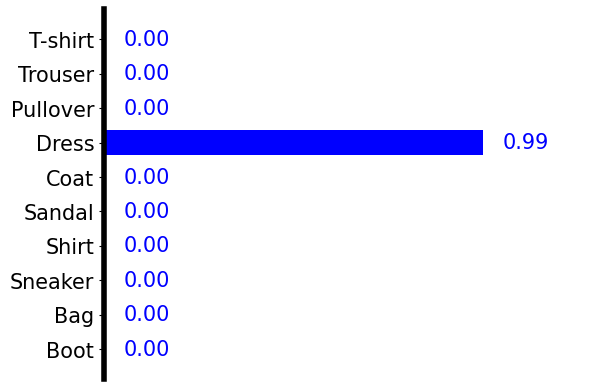

In [13]:
utils.show_prob_fashion_mnist(prob)

### Choose image at random from the test set and see how good/bad are the predictions

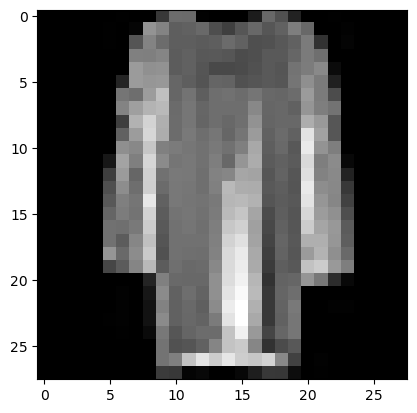

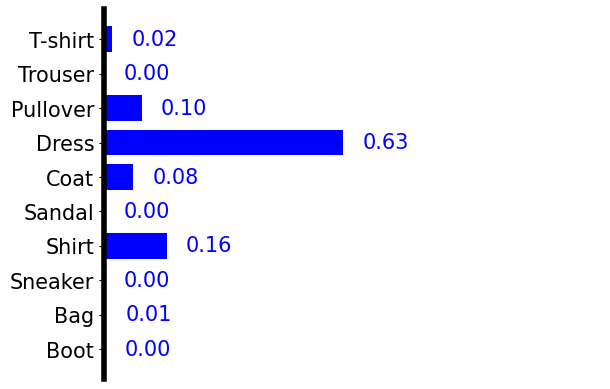

In [14]:
# choose a picture at random
idx=randint(0, 10000-1)
im=test_data[idx]

# diplay the picture
utils.show(im)

# feed it to the net and display the confidence scores
prob =  net( im.view(1,784)) 
utils.show_prob_fashion_mnist(prob)